In [2]:
%load_ext autoreload
%autoreload 2

from itertools import product
from utils.dgps import generate_benchmark_data
from utils.estimators import (
    twfe_fixest, twfe_fixest_compressed, twfe_statsmodels, duck_mundlak
)
from utils.benchmark import Bench
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
%%capture

N_values = [1000, 10_000]
# 2-5 weeks of runtime, daily data
T_values = [14, 21, 28]
# one week prior
T0_values = [7]
iter = 3

all_benchmarks_df = pd.DataFrame()

for N, T, T0 in product(N_values, T_values, T0_values):

    bench = Bench(N = N, T = T, T0 = T0, iter = 3)
    bench.mark(fun = twfe_fixest)
    #bench.mark(fun = twfe_statsmodels)
    # add mundlak twfe via pyfixest in memory once on PyPi
    bench.mark(fun = duck_mundlak)
    
    bench_df = bench.to_dataframe()
    bench_df["N"] = N
    bench_df["T"] = T
    bench_df["T0"] = T0
    
    all_benchmarks_df = pd.concat(
        [all_benchmarks_df, bench_df], 
        axis = 0
    )

In [ ]:
all_benchmarks_df.head()

,twfe_fixest,twfe_statsmodels,duck_mundlak,N,T,T0
0,0.020054,4.542627,0.045307,1000,14,7
1,0.018306,4.679661,0.043150,1000,14,7
2,0.017666,4.886612,0.039551,1000,14,7
0,0.027436,7.437598,0.044361,1000,21,7
1,0.033614,6.815723,0.046144,1000,21,7


C:\Users\alexa\Documents\panel-scale-code\.pixi\envs\default\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\alexa\Documents\panel-scale-code\.pixi\envs\default\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\alexa\Documents\panel-scale-code\.pixi\envs\default\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\alexa\Documents\panel-scale-code\.pixi\envs\default\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Text(0.5, 0.98, 'Violin Plots of Models for Different N and T')

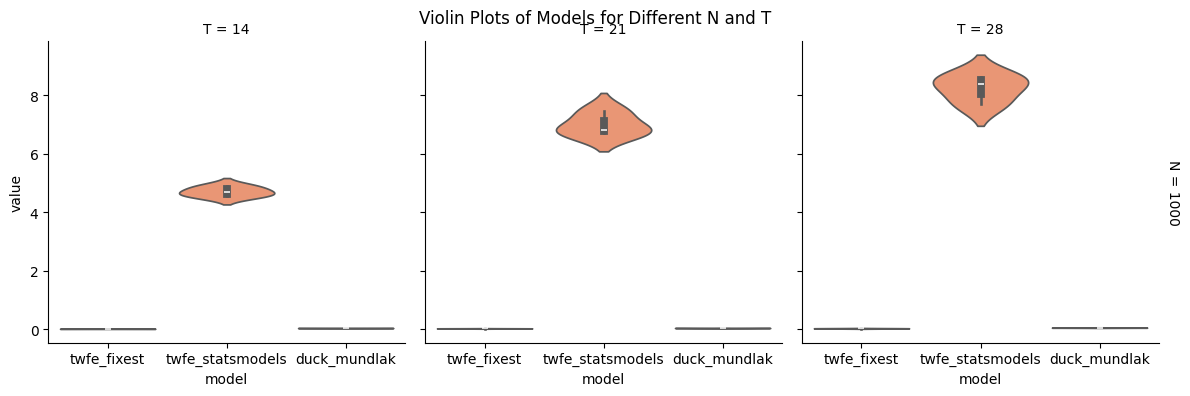

In [ ]:
all_benchmarks_df_melted = all_benchmarks_df.melt(id_vars=['N', 'T', 'T0'], value_vars=['twfe_fixest', 'twfe_statsmodels', 'duck_mundlak'], 
                    var_name='model', value_name='value')

# Create violin plots with different panels for N and T, and different colors for models
g = sns.FacetGrid(all_benchmarks_df_melted, col="T", row="N", margin_titles=True, height=4, aspect=1)
g.map(sns.violinplot, 'model', 'value', palette='Set2')

# Adjust layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Violin Plots of Models for Different N and T')

In [ ]:
g = sns.FacetGrid(df_melted, col="T", row="N", margin_titles=True, height=4, aspect=1)
g.map(sns.violinplot, 'model', 'value', hue='model', palette='Set2', legend=False)

# Adjust layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Violin Plots of Models for Different N and T')

plt.show()